In [93]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import numpy as np
import pandas as pd
df=pd.read_csv("D:\\ExcelR Assignments\\Assignment 16\\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [97]:
# Checking for the missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [99]:
# As we see there are no missing values

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [103]:
# All the columns are already encoded except the animal name. So I am removing the animal name feature
df_final = df.iloc[:,1:]
df_final

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


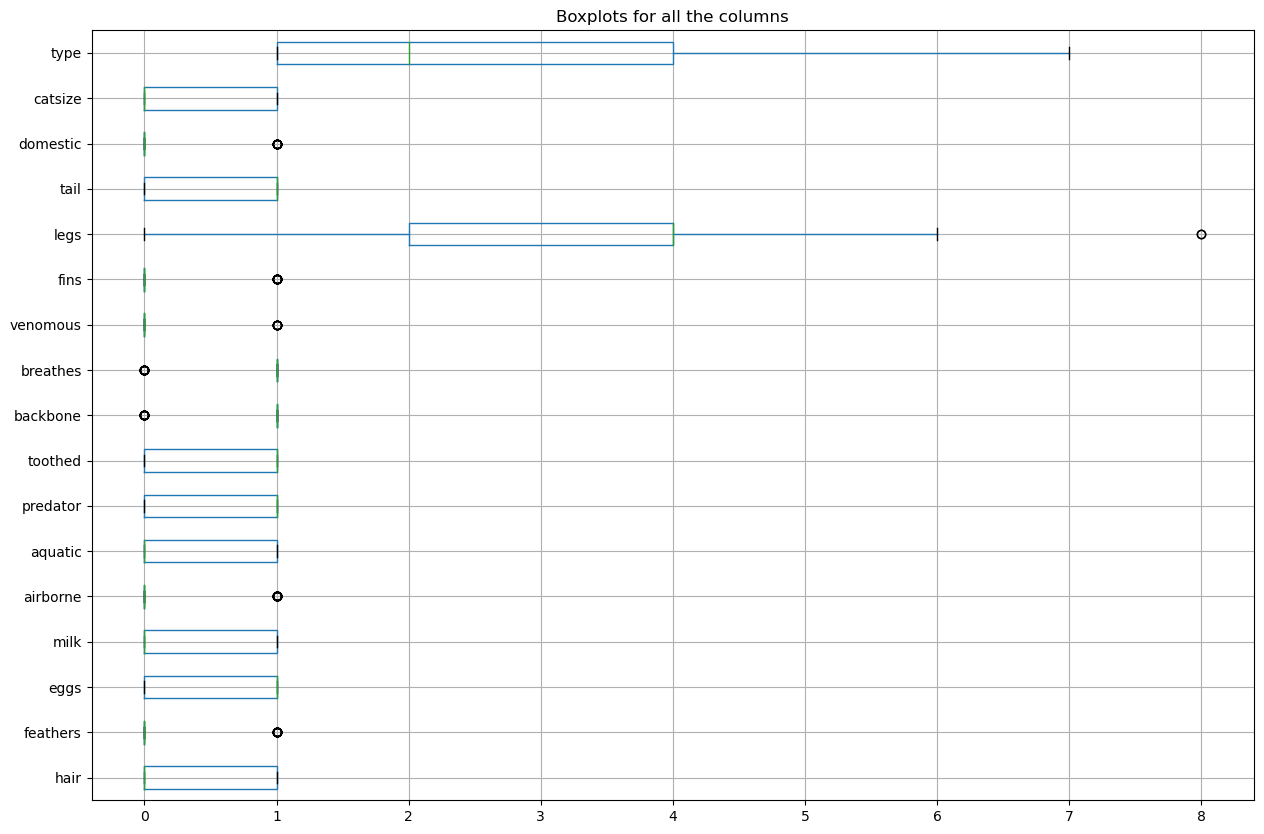

In [105]:
import matplotlib.pyplot as plt

df_final.boxplot(figsize=(15,10),vert=False)
plt.title("Boxplots for all the columns")
plt.show()

In [107]:
# As we see there are very less outliers.Only some columns contains single outlier which is not a big issue.

In [127]:
Y = df_final["type"]
X = df_final.drop("type",axis=1)

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [137]:
# grid search cv
param_grid = {'n_neighbors': range(1, 31)}  # Testing k values from 1 to 30

# Use GridSearchCV to find the best alpha
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best value of k and corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best value of k: {best_k}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

Best value of k: 1
Best cross-validated accuracy: 0.9750


In [141]:
# Using grid search cv method we found the best k value is 1.Let us implement the model using k=1

In [151]:
# Model fitting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=i)
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))
    precision = precision_score(Y_test, Y_pred_test, average='weighted')  # 'weighted' for multi-class classification
    recall = recall_score(Y_test, Y_pred_test, average='weighted')
    f1 = f1_score(Y_test, Y_pred_test, average='weighted')


print("Cross validation training accuracy:", np.round(np.mean(training_acc),2))
print("Cross validation test accuracy:", np.round(np.mean(test_acc),2))
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Cross validation training accuracy: 1.0
Cross validation test accuracy: 0.97
Precision: 0.9206
Recall: 0.9524
F1-Score: 0.9333


In [157]:
# With using k=1 ,we got 100% training accuracy and 97% test accuracy which is a best fit.
# Also we got high precision,Recall and F1-Score
# We conclude that this is a best model for identifyng the type in the given dataset

Interview Questions:

In [ ]:
'''
1. What are the key hyperparameters in KNN?
Key hyperparameters in K-Nearest Neighbors (KNN) are:
n_neighbors: The number of neighbors to consider for classifying a data point. 
A smaller k can lead to a noisy model, while a larger k may underfit.
weights: Determines how much influence each neighbor has. Options include:
    'uniform': All neighbors have equal weight.
    'distance': Closer neighbors have higher weight.
algorithm: The algorithm used to compute nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'.
p: The power parameter for the Minkowski distance. p=1 for Manhattan distance, p=2 for Euclidean distance.

2. What distance metrics can be used in KNN?
In K-Nearest Neighbors (KNN), various distance metrics can be used to measure the similarity between data points:
Euclidean Distance: The most common metric, measuring the straight-line distance between two points.
Manhattan Distance: The sum of the absolute differences of their coordinates, also called city-block distance.
Minkowski Distance: A generalization of Euclidean and Manhattan distance, with a parameter 𝑝 that determines the type of distance.
Cosine Similarity: Measures the cosine of the angle between two vectors, useful for high-dimensional data like text.
Hamming Distance: Used for categorical variables, counts the number of differing features.
'''